In [1]:
import json

import os.path

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import typing
import my_utils.gainratio as gr # my own realization of gain ratio
import my_utils.statistics as stat # some functions to get info about pd.DataFrame
import lab_2.preparations.converter as cnvt

In [2]:
df = pd.read_csv('./row/agaricus-lepiota.data', sep=',', names=[
    'is-poisonus', 'cap-shape', 'cap-surface', 'cap-color',
    'bruises?', 'odor', 'gill-attachment', 'gill-spacing',
    'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring',
    'veil-type', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
])
df

,is-poisonus,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.to_csv('./row/mushrooms.csv', index=False)

In [4]:
frame = stat.get_some_statistics_categorial(df)
frame

,is-poisonus,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
Процент_пропусков,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Мощность,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
Мода,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
Процент_моды,51.797144,45.002462,39.931068,28.114229,58.444116,43.426883,97.415066,83.85032,69.079271,21.27031,...,60.758247,54.948301,53.963565,100.0,97.538159,92.171344,48.842935,29.394387,49.729197,38.749385
Вторая_мода,p,f,s,g,t,f,a,w,n,p,...,k,p,p,NaN,n,t,e,n,y,g
Процент_моды,48.202856,38.798621,31.462334,22.648941,41.555884,26.587888,2.584934,16.14968,30.920729,18.365337,...,28.360414,23.042836,23.042836,0.0,1.181684,7.385524,34.170359,24.22452,21.073363,26.440177


Удаляем <b>veil-type</b>, т.к. он имеет мощность 1

In [5]:
df = df.drop(['veil-type'], axis=1)

In [6]:
frame = stat.get_some_statistics_categorial(df)
frame

,is-poisonus,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
Процент_пропусков,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Мощность,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
Мода,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
Процент_моды,51.797144,45.002462,39.931068,28.114229,58.444116,43.426883,97.415066,83.85032,69.079271,21.27031,...,63.712457,60.758247,54.948301,53.963565,97.538159,92.171344,48.842935,29.394387,49.729197,38.749385
Вторая_мода,p,f,s,g,t,f,a,w,n,p,...,k,k,p,p,n,t,e,n,y,g
Процент_моды,48.202856,38.798621,31.462334,22.648941,41.555884,26.587888,2.584934,16.14968,30.920729,18.365337,...,29.19744,28.360414,23.042836,23.042836,1.181684,7.385524,34.170359,24.22452,21.073363,26.440177


In [7]:
def show_statistics(df: pd.DataFrame) -> None:
    info_df = stat.get_some_statistics_categorial(df)
    for i in df.columns:
        plt.figure(i)
        sns.histplot(df[i], kde=False, stat="density")
        plt.show()

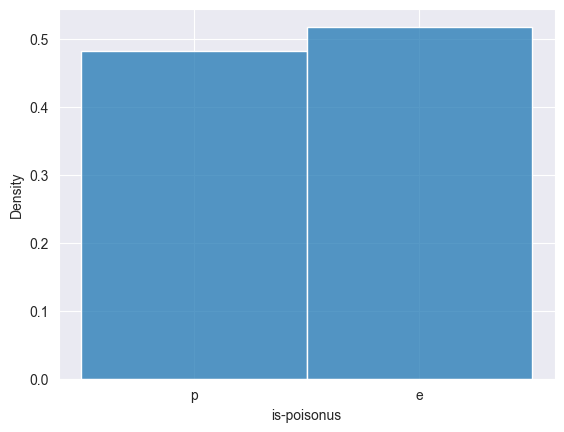

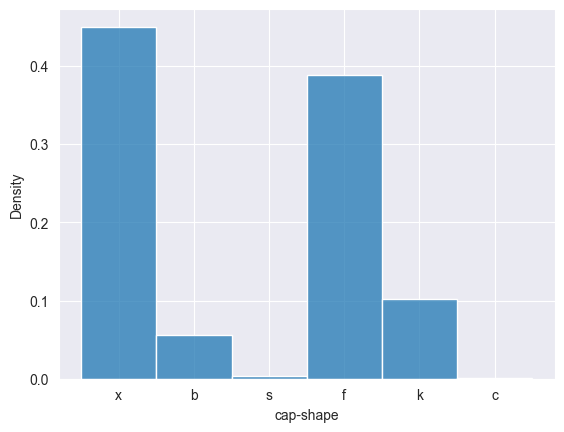

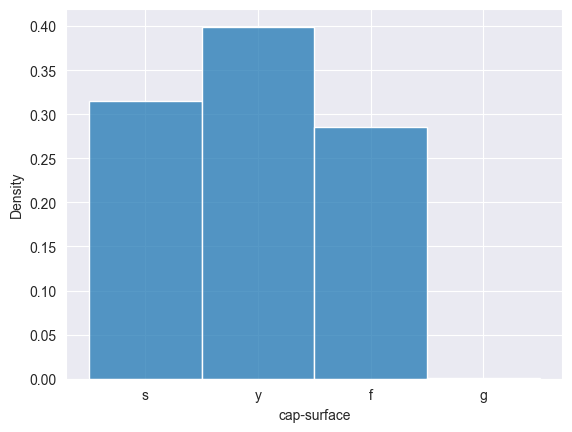

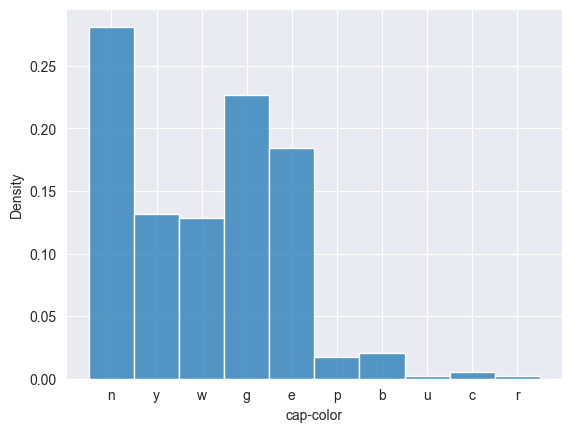

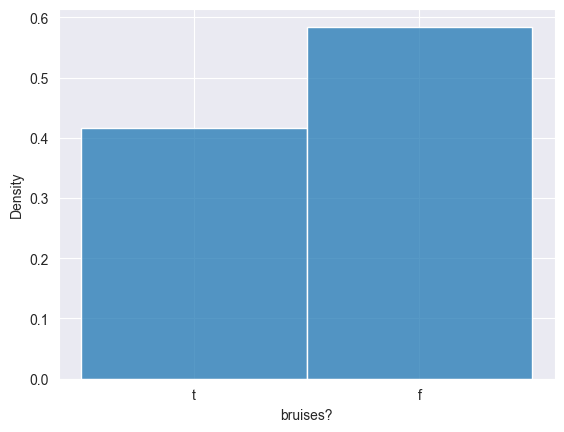

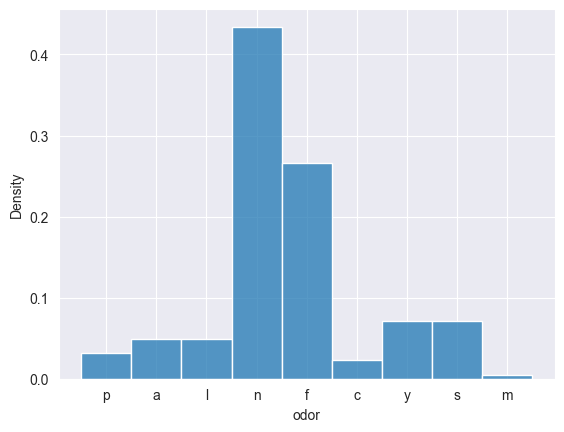

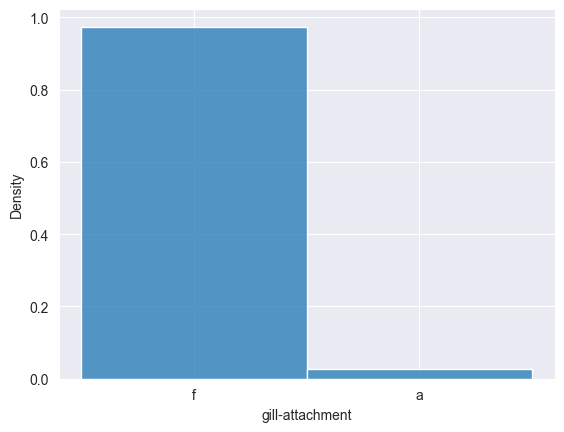

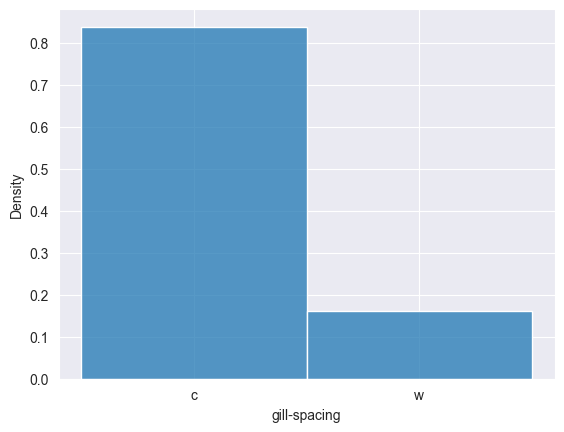

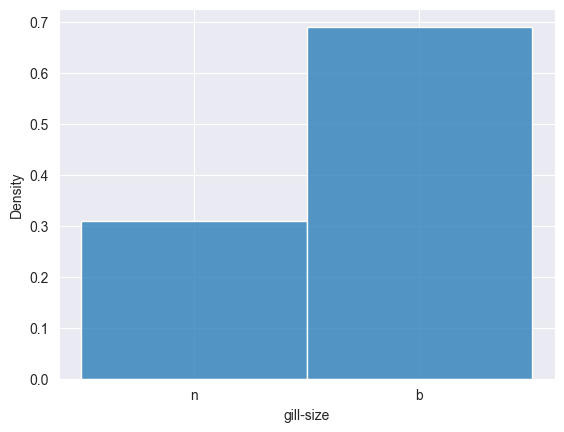

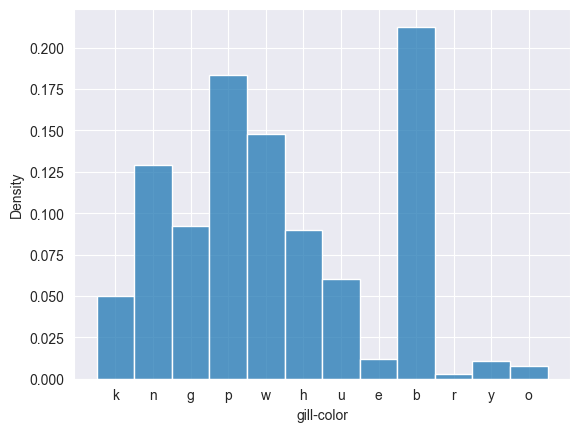

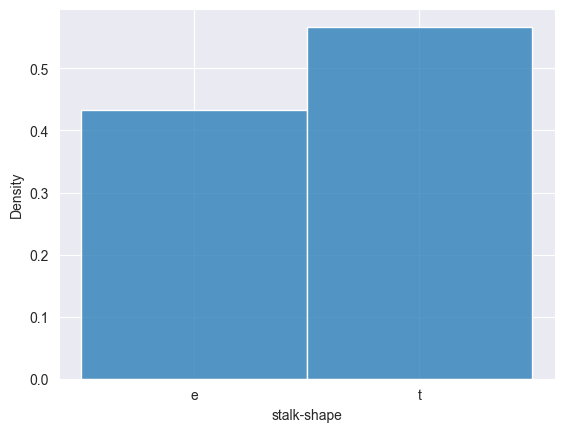

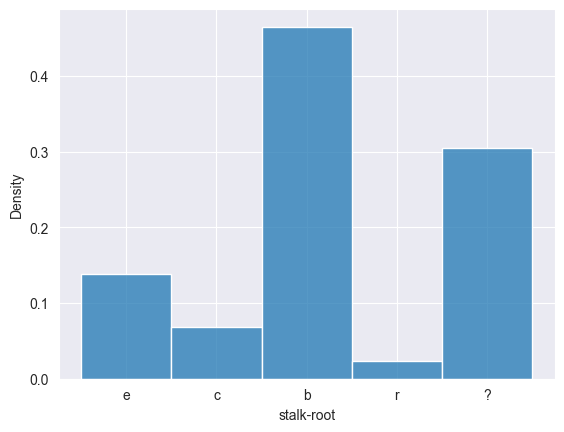

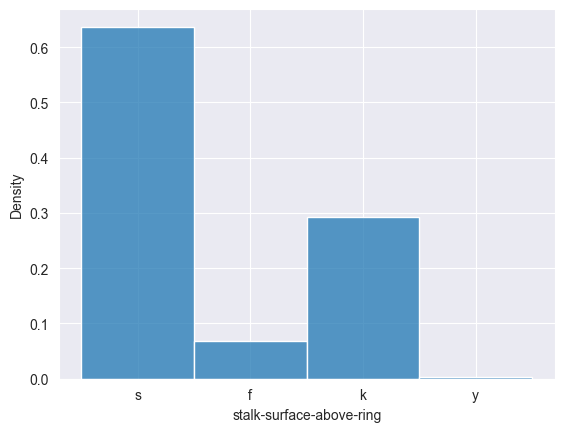

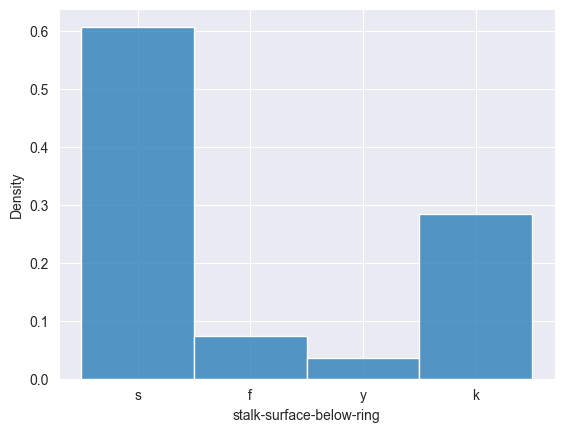

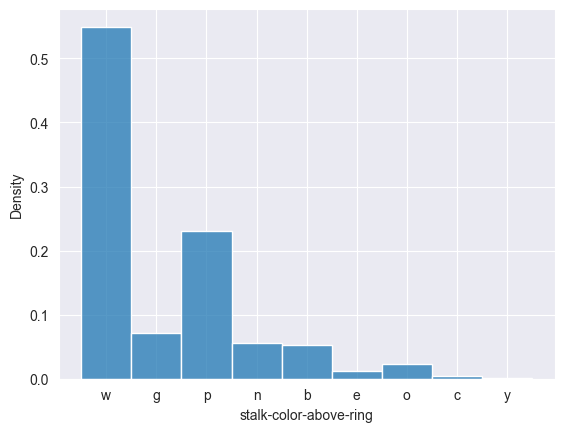

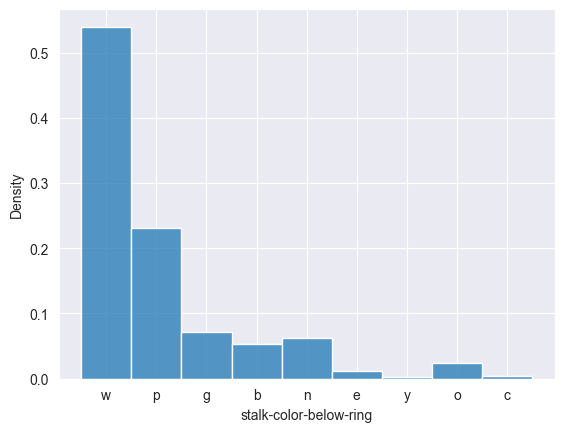

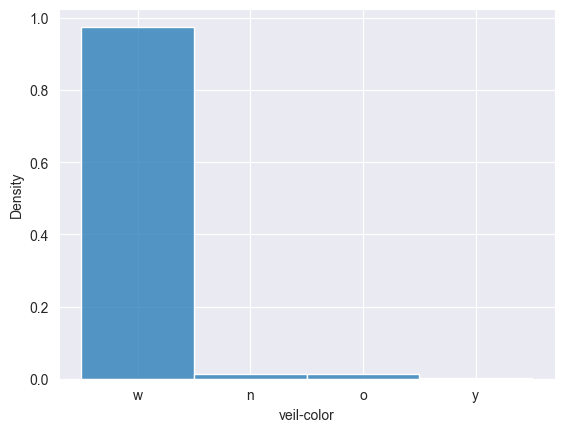

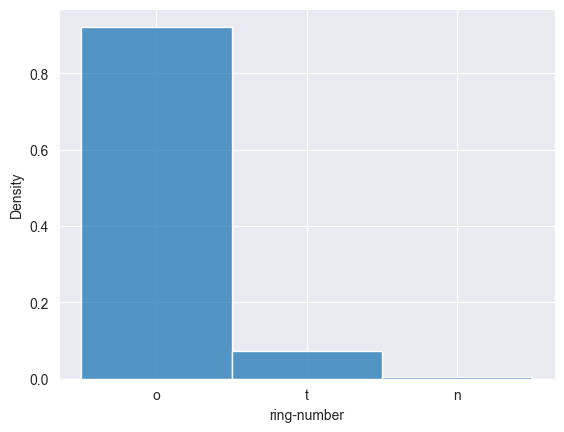

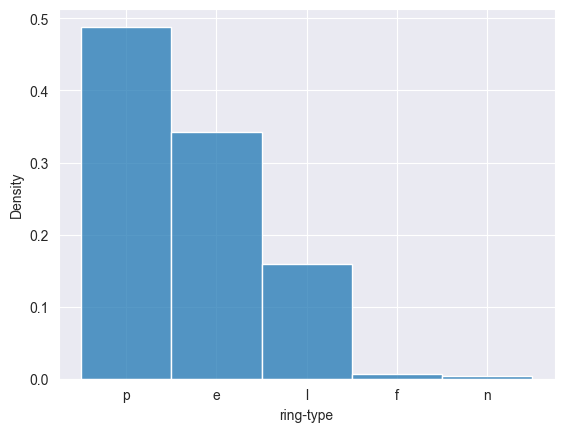

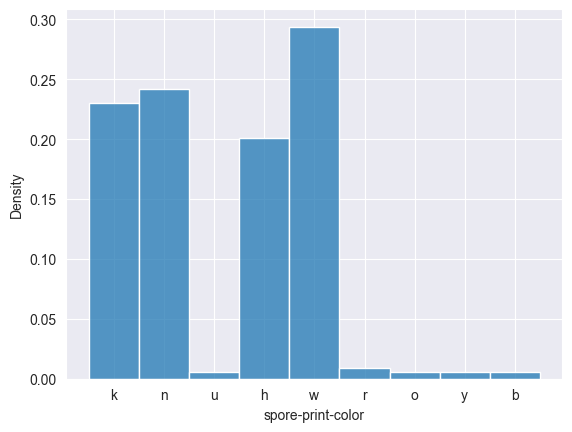

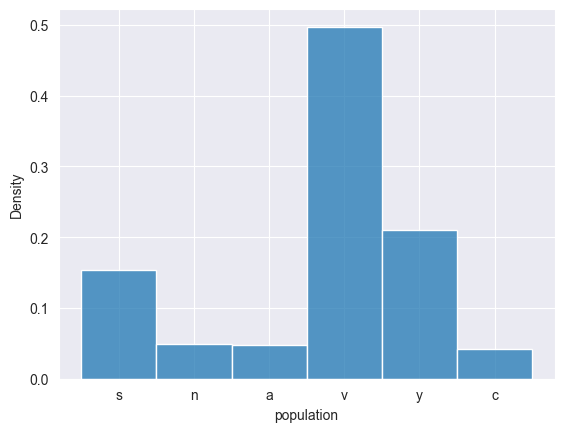

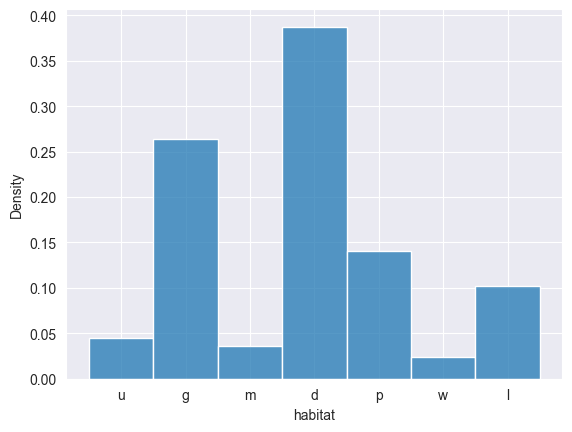

In [8]:
show_statistics(df)

Make target column the last:

In [9]:
l = list(df.columns[1:])
l.append(df.columns[0])
df = df[l]
df

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is-poisonus
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,w,o,e,w,v,l,p


In [10]:
df, characters_to_nums, nums_to_characters = cnvt.convert_characters_to_nums(df, df.columns, '?')
df[df.columns] = df[df.columns].astype(float)
open(os.path.join('processed', 'characters_to_nums.txt'), 'w').write(
    json.dumps(characters_to_nums, sort_keys=False, indent=3))
open(os.path.join('processed', 'nums_to_characters.txt'), 'w').write(
    json.dumps(nums_to_characters, sort_keys=False, indent=3))
new_df = cnvt.convert_vals_with_rule(df, df.columns, nums_to_characters)
new_df

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is-poisonus
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,w,o,e,w,v,l,p


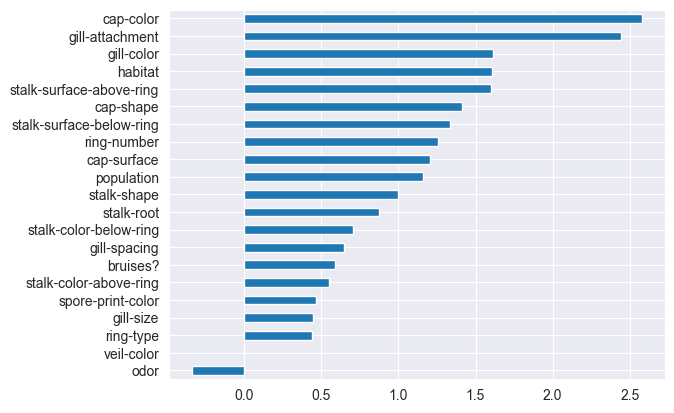

In [11]:
feature_importance = gr.data_set_gain_ratio(df, df.columns[-1], 1,
                                            pd.Series([True] * len(df.columns),
                                                      df.columns))
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh')
plt.show()

<Axes: >

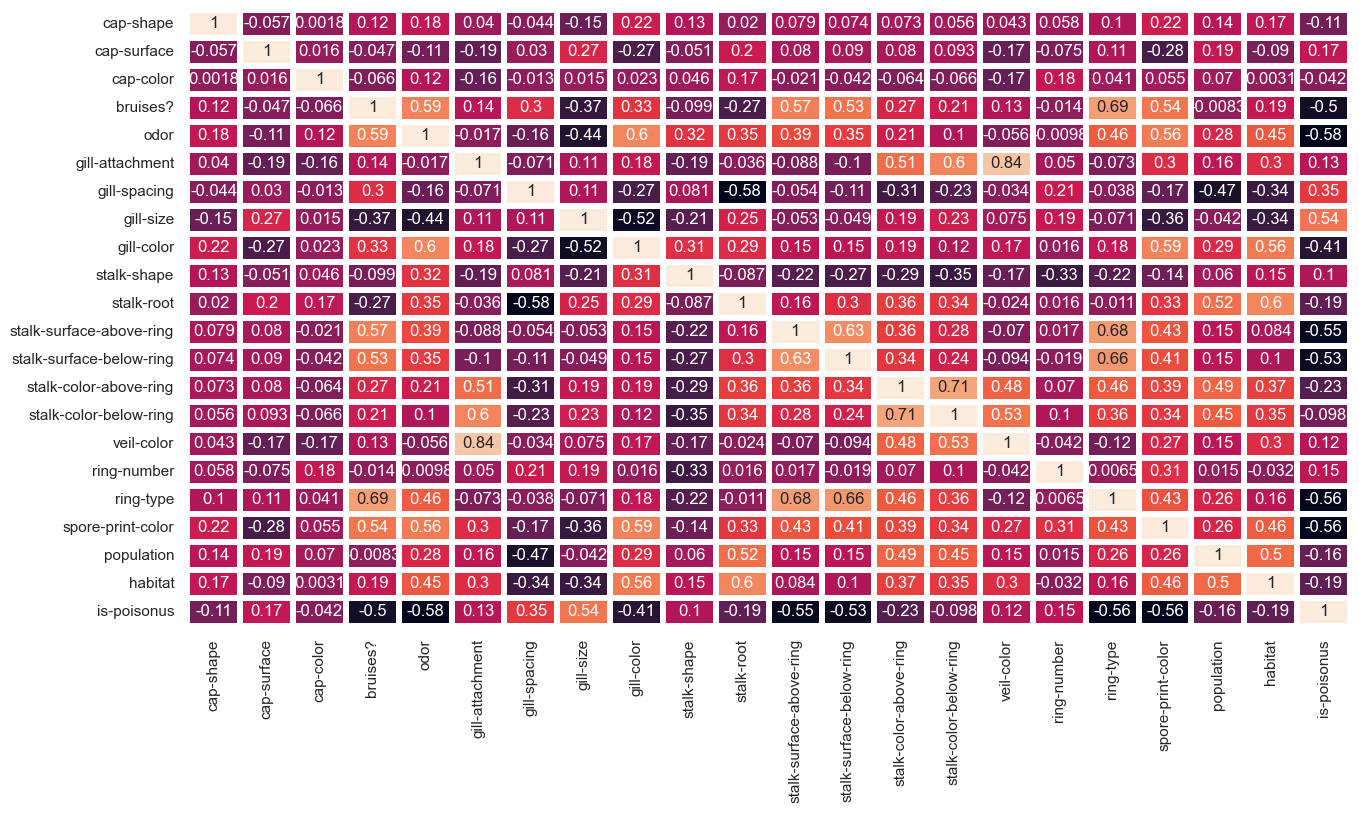

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

In [13]:
new_df.to_csv(os.path.join('processed', 'mushrooms.csv'), index=False)
open(os.path.join('processed', 'replacements.txt'), 'w').write(
    json.dumps(characters_to_nums, sort_keys=False, indent=3))
df

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,is-poisonus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,0.0,...,0.0,6.0,7.0,2.0,0.0,0.0,8.0,5.0,6.0,1.0
8120,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,10.0,0.0,...,0.0,6.0,7.0,1.0,0.0,0.0,8.0,3.0,6.0,1.0
8121,3.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,...,0.0,6.0,7.0,2.0,0.0,0.0,8.0,5.0,6.0,1.0
8122,4.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,8.0,1.0,...,3.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,6.0,0.0
